# Data analyzes I - basics in data handling

## Before we get started ...

- most of what you’ll see within this lecture was prepared by Ross Markello, Michael Notter and Peer Herholz and further adapted for this course by Peer Herholz 
- based on Tal Yarkoni's ["Introduction to Python" lecture at Neurohackademy 2019](https://neurohackademy.org/course/introduction-to-python-2/)
- based on [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

## Why do data science in Python?

* all the general benefits of the `Python language` (`open source`, fast, etc.)
    * Specifically, it's a **widely used/very flexible**, **high-level**, **general-purpose**, **dynamic** programming language
* the `Python ecosystem` contains tens of thousands of packages, several are very widely used in data science/processing applications:
    * [Jupyter](http://jupyter.org): interactive notebooks
    * [Numpy](http://numpy.org): numerical computing in `Python`
    * [pandas](http://pandas.pydata.org/): data structures for `Python`
    * [Scipy](http://scipy.org): scientific `Python` tools
    * [Matplotlib](http://matplotlib.org): plotting in `Python`
    * [seaborn](https://seaborn.pydata.org/index.html): plotting in `Python`
    * [plotly](https://plotly.com/python/): interactive data visualization in Python    
    * [scikit-learn](http://scikit-learn.org): machine learning in `Python`
    * [statsmodels](https://www.statsmodels.org/stable/index.html): statistical analyses in `Python`
    * [pingouin](https://pingouin-stats.org/): statistical analyses in `Python`
    * [psychopy](https://www.psychopy.org/): running experiments in `Python`
    * [nilearn](https://nilearn.github.io/stable/index.html): brain imaging analyses in `Python`
    * [mne](https://mne.tools/stable/index.html): electrophysiology analyses in `Python`
    * [pygaze](https://www.pygaze.org/): Eye-Tracking analyses in `Python` 

* even more: `Python` has very good (often best-in-class) external packages for almost everything
* Particularly important for data science, which draws on a very broad toolkit
* Package management is easy (conda, pip)
* Examples for further important/central python data science packages :
    * Web development: flask, Django
    * Database ORMs: SQLAlchemy, Django ORM (w/ adapters for all major DBs)
    * Scraping/parsing text/markup: beautifulsoup, scrapy
    * Natural language processing (NLP): nltk, gensim, textblob
    * Numerical computation and data analysis: numpy, scipy, pandas, xarray
    * Machine learning: scikit-learn, Tensorflow, keras
    * Image processing: pillow, scikit-image, OpenCV
    * Plotting: matplotlib, seaborn, altair, ggplot, Bokeh
    * GUI development: pyQT, wxPython
    * Testing: py.test

### Widely-used
* Python is the fastest-growing major programming language
* Top 3 overall (with JavaScript, Java)

<center><img src="https://149351115.v2.pressablecdn.com/wp-content/uploads/2017/09/growth_major_languages-1-1400x1200.png" width="800px" style="margin-bottom: 10px;"></center>

What we will do in this section of the course is a _short_ introduction to `Python` for `data analyses` including basic `data operations` like `file reading` and `wrangling`, as well as `statistics` and `data visualization`. The goal is to showcase crucial tools/resources and their underlying working principles to allow further more in-depth exploration and direct application. 

It is divided into the following chapters:

- [Getting ready]()
- [Basic data operations]()
    - [Reading data]()
    - [Exploring data]()
    - [Data wrangling]()
- [Basic data visualization]()    
    - [Underlying principles]()
    - ["standard" plots]()
    - [Going further with advanced plots]()
- [Statistics in python]()
    - [Descriptive analyses]()
    - [Inferential analyses]()
- [Interactive data visualization]()

Here's what we will focus on in the first block:

- [Getting ready]()
- [Basic data operations]()
    - [Reading data]()
    - [Exploring data]()
    - [Data wrangling]()

## Getting ready

What's the first thing we have to check/evaluate before we start working with data, no matter if in `Python` or any other software? That's right: getting everything ready! 

This includes outlining the core workflow and respective steps. Quite often, this notebook and its content included, this entails the following:

1. What kind of data do I have and where is it?
2. What is the goal of the data analyses?
3. How will the respective steps be implemented?

So let's check these aspects out in slightly more detail.

### What kind of data do I have and where is it

The first crucial step is to get a brief idea of the kind of data we have, where it is, etc. to outline the subsequent parts of the workflow (`python modules` to use, analyses to conduct, etc.). At this point it's important to note that `Python` and its `modules` work tremendously well for basically all kinds of data out there, no matter if `behavior`, `neuroimaging`, etc. . To keep things rather simple, we will use a `behavioral dataset` that contains `reaction times` and `accuracies` (and some `demographic information`) from a `Choice Reaction Time` task. 

Yes, exactly: the task we implemented in the [PsychoPy session](https://julia-pfarr.gitlab.io/nowaschool/materials/psychopy/overview_psychopy.html).

```{admonition} What was this task all about?
:class: tip, dropdown

Participants were presented with different `stimuli` and had to indicate which one they saw via a `button press`. From these `responses` `reaction times` and `accuracies` were computed.
```

Given that we follow a dedicated `data` and `project structure`, specifically:

```bash
choice_rtt/
    code/
        experiment/
            crtt_exp.py
    stimuli/
        shapes/
    sourcedata/
        sub-ID
    sub-ID/
    derivatives/
        pipeline/
            sub-ID
```

and want to explore `data` that was not processed in any form yet....

```{admonition} Where we would look for our data?
:class: tip, dropdown

In the `choice_rtt/sourcedata` `directory` as it contains `data` in the form it was acuqired in, before `conversion`, `standardization` and `processing`.
```

NB: as didn't have time to acutally acquire a lot of/any data, we simulated data based on the `responses` from our final `experiment`. You can check the respective code below.

```{admonition} Click here for the simulation code
:class: tip, dropdown

```python
import os
import pandas as pd
import numpy as np

np.random.seed(seed=42)

# Path to the uploaded template CSV file
template_csv_path = '/Users/peerherholz/Desktop/sourcedata_backup/sub-01/ses-test/01_test_crtt_exp_2024-02-02_09h43.24.388.csv'

# Read in the template data from the CSV file
template_data = pd.read_csv(template_csv_path)

# Extract necessary components for simulation
experiment_name = template_data['expName'].iloc[0]
experiment_date = template_data['date'].iloc[0]

# Your existing setup...
base_dir = '/Users/peerherholz/Desktop/choice_rtt/sourcedata/'

# Simulation functions
def simulate_age():
    return np.random.randint(18, 41)

def simulate_left_handed():
    return np.random.choice([False, True], p=[0.93, 0.07])

def simulate_session_likes():
    return np.random.choice(['Yes', 'No'], p=[0.7, 0.3])

# Function to generate the TargetImage column with a specific structure
def simulate_target_image_blocks(block_shapes_paths, block_images_paths):
    simulated_images = [np.nan] * 3  # Start with 3 empty rows
    simulated_images += np.random.choice(block_shapes_paths, 6, replace=True).tolist() + [np.nan]
    simulated_images += np.random.choice(block_shapes_paths, 12, replace=True).tolist() + [np.nan] * 6
    simulated_images += np.random.choice(block_images_paths, 6, replace=True).tolist() + [np.nan]
    simulated_images += np.random.choice(block_images_paths, 12, replace=True).tolist() + [np.nan]
    return simulated_images

def simulate_trial_resp_times(num_rows, cond):
    if cond=='test':
        strt = np.random.uniform(0.8, 1.5, num_rows)
    elif cond=='post':
        strt = np.random.uniform(0.3, 1, num_rows)
    return strt

def simulate_keyboard_response_corr(num_rows, cond):
    if cond=='test':
        skrc = np.random.choice([0, 1], num_rows, p=[1-0.73, 0.73])
    elif cond=='post':
        skrc = np.random.choice([0, 1], num_rows, p=[1-0.85, 0.85])
    return skrc

# Preparing the paths for shapes and images
target_images = template_data['TargetImage'].dropna().unique()
block_shapes = ['plus', 'square', 'cross']
block_images = ['capybara', 'wombat', 'platypus']
block_shapes_paths = [img for img in target_images if any(shape in img for shape in block_shapes)]
block_images_paths = [img for img in target_images if any(image in img for image in block_images)]


total_rows = 48  # Adjusted total to account for the correct structure...

# Generate participant-specific attributes outside the sessions loop
participant_ages = {pid: simulate_age() for pid in range(1, 31)}
participant_handedness = {pid: simulate_left_handed() for pid in range(1, 31)}

# Adjusted loop to generate and save simulated data
for participant_id in range(1, 31):
    formatted_participant_id = f"{participant_id:02d}"

    # Use pre-generated attributes
    age = participant_ages[participant_id]
    left_handed = participant_handedness[participant_id]

    for session_type in ['test', 'post']:
        participant_dir = os.path.join(base_dir, f"sub-{formatted_participant_id}", f"ses-{session_type}")
        os.makedirs(participant_dir, exist_ok=True)
        file_name = f"{formatted_participant_id}_{session_type}_{experiment_name}_{experiment_date}.csv"
        file_path = os.path.join(participant_dir, file_name)
        
        # Initialize DataFrame...
        simulated_data = pd.DataFrame(index=range(total_rows))
        simulated_data['participant_id'] = [formatted_participant_id] * total_rows
        simulated_data['age'] = [age] * total_rows  # Use the pre-generated age
        simulated_data['left-handed'] = [left_handed] * total_rows  # Use the pre-generated handedness
        simulated_data['Do you like this session?'] = [simulate_session_likes()] * total_rows
        simulated_data['session'] = [session_type] * total_rows
        simulated_data['TargetImage'] = simulate_target_image_blocks(block_shapes_paths, block_images_paths)
        
        # Fill specified columns with simulated data
        if session_type=='test':
            simulated_data['trialRespTimes'] = simulate_trial_resp_times(total_rows, 'test')
            simulated_data['keyboard_response.corr'] = simulate_keyboard_response_corr(total_rows, 'test')
        elif session_type=='post':
            simulated_data['trialRespTimes'] = simulate_trial_resp_times(total_rows, 'post')
            simulated_data['keyboard_response.corr'] = simulate_keyboard_response_corr(total_rows, 'post')


        # Copy other columns from the template...
        for col in template_data.columns:
            if col not in ['participant_id', 'age', 'left-handed', 'Do you like this session?', 'TargetImage', 'trialRespTimes', 'keyboard_response.corr', 'session']:
                simulated_data[col] = template_data[col]

        simulated_data.to_csv(file_path, index=False)

print(f"Simulated data files saved in: {base_dir}")
```
```

Knowing where all `data files` are located, we will use the [os](https://docs.python.org/3/library/os.html) `module` to change our `current working directory` to the `choice_rtt` `directory` to make things easier (in my case, it's on my `Desktop` but your's might be somewhere else, so please adjust the `path` respectively) and will also have a look at what:

In [3]:
from os import chdir, listdir

chdir('/Users/peerherholz/Desktop/choice_rtt')

listdir('.')

['sub-13',
 'sub-14',
 'sub-22',
 'sub-25',
 'sub-24',
 'sub-23',
 'sub-15',
 'sub-12',
 '.DS_Store',
 'derivatives',
 'sourcedata',
 'code',
 'sub-30',
 'sub-08',
 'sub-01',
 'sub-06',
 'sub-07',
 'sub-09',
 'stimuli',
 'sub-17',
 'sub-28',
 'sub-10',
 'sub-26',
 'sub-19',
 'sub-21',
 'sub-20',
 'sub-27',
 'sub-18',
 'sub-11',
 'sub-16',
 'sub-29',
 'sub-05',
 'sub-02',
 'sub-03',
 'sub-04']

In [4]:
listdir('./sourcedata/')

['sub-13',
 'sub-14',
 'sub-22',
 'sub-25',
 'sub-24',
 'sub-23',
 'sub-15',
 'sub-12',
 '.DS_Store',
 'sub-30',
 'sub-08',
 'sub-01',
 'sub-06',
 'sub-07',
 'sub-09',
 'sub-17',
 'sub-28',
 'sub-10',
 'sub-26',
 'sub-19',
 'sub-21',
 'sub-20',
 'sub-27',
 'sub-18',
 'sub-11',
 'sub-16',
 'sub-29',
 'sub-05',
 'sub-02',
 'sub-03',
 'sub-04']

In [5]:
listdir('./sourcedata/sub-01')

['ses-test', 'ses-post']

In [6]:
listdir('./sourcedata/sub-01/ses-test/')

['01_test_crtt_exp_2024-02-02_09h43.24.388.csv']

In [7]:
listdir('./sourcedata/sub-01/ses-post/')

['01_post_crtt_exp_2024-02-02_09h43.24.388.csv']

Now we can actually already start using `Python` to explore things further. For example, we can use the [glob]() `module` to check what `files` are in this directory and obtain a respective `list`:

In [8]:
from glob import glob

data_files = glob('sourcedata/*/*/*.csv')

As you can see, we provide a `path` as `input` to the `function` and end with an `*.csv` which means that we would like to gather all `files` that are in this `directory` that end with `.csv` (ie the `summary output` files we got from `PsychoPy`). If you already know more about your `data`, you could also use other `expressions` and `patterns` to restrain the `file list` to files with a certain name or `extension`. Importantly, we have to include three `*`, to indicate that we want to gather files across all levels (ie `participant`, `session`, within `session`).

So let's see what we got. Remember, the function should output a `list` of all `files` in the specified `directory`.  

In [9]:
data_files

['sourcedata/sub-13/ses-test/13_test_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-13/ses-post/13_post_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-14/ses-test/14_test_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-14/ses-post/14_post_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-22/ses-test/22_test_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-22/ses-post/22_post_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-25/ses-test/25_test_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-25/ses-post/25_post_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-24/ses-test/24_test_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-24/ses-post/24_post_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-23/ses-test/23_test_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-23/ses-post/23_post_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-15/ses-test/15_test_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata

Coolio, that worked. We get a `list` indicating all `files` as `items` in the form of `strings`. We also see that we get the `relative paths` and that our `files` are in `.csv` format. Having everything in a `list`, we can make use of this great `python` `data type` and e.g. check how many `files` we have, as well as if we have two `files` for every `participant`, one per `session` (should be `60`: `30` `participants` and `2 sessions`).      

In [10]:
print(len(data_files))

if len(data_files)==60:
    print('The number of data files matches the number of participants.')
elif len(data_files) > 60:
    print('There are %s more data files than participants.' %str(int(len(data_files)-60)))
elif len(data_files) < 60:
    print('There are %s data files missing.' %str(60-len(data_files)))

60
The number of data files matches the number of participants.


Sometimes `files` can contain a `' '`, i.e. `space`, and knowing that this can cause major problems when coding `analyzes`, we will use `python` again to `rename` them. Specifically, we will use the [rename]() `function` of the [os]() `module`. It expects the `old file name` and the `new file name` as `positional arguments`, i.e. `os.rename(old_file_name, new_file_name)`. While renaming, we follow "best practices" and will `replace` the `space` with an `_`. In order to avoid doing this manually for all `files`, we will just use a combination of a `for loop` and an `if statement`:

In [11]:
from os import rename

for file in data_files:
    if ' ' in file:
        rename(file, file.replace(' ', "_"))

```{admonition} Can you describe what behavior the above lines of `code` implement?
:class: tip, dropdown

For each `file` in our `list` of files called `data_files` we will check if there's a `' '`, i.e. `space`, in the `file name` and if so, `rename` the respective `file`, `replacing` the `' '` with an `_`.  
```

See how cool and easy the `python basics` we explored in the introduction can be applied "in the wild"? That being said, we should check if everything worked as expected and get an updated `list` of our `files`: 

In [12]:
data_files = glob('sourcedata/*/*/*.csv')

data_files.sort()

data_files

['sourcedata/sub-01/ses-post/01_post_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-01/ses-test/01_test_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-02/ses-post/02_post_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-02/ses-test/02_test_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-03/ses-post/03_post_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-03/ses-test/03_test_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-04/ses-post/04_post_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-04/ses-test/04_test_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-05/ses-post/05_post_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-05/ses-test/05_test_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-06/ses-post/06_post_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-06/ses-test/06_test_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata/sub-07/ses-post/07_post_crtt_exp_2024-02-02_09h43.24.388.csv',
 'sourcedata

Great! With these basics set, we can continue and start thinking about the potential goal of the analyses.

### What is the goal of the data analyzes

There obviously many different routes we could pursue when it comes to `analyzing data`. Ideally, we would know that before starting (`pre-registration` much?) but we all know how these things go... For the `dataset` at hand analyzes and respective steps will be on the rather exploratory side of things. How about the following:

- read in single participant data
- explore single participant data
- extract needed data from single participant data
- convert extracted data to more intelligible form
    - repeat for all participant data
    - combine all participant data in one file
- explore data from all participants
    - general overview
    - basic plots
- analyze data from all participant
    - descriptive stats
    - inferential stats
        
Sounds roughly right, so how we will implement/conduct these steps?        

### How will the respective steps be implemented

After creating some sort of outline/workflow, we need to think about the respective steps in more detail and set overarching principles. Regarding the former, it's good to have a first idea of potentially useful `python modules` to use. Given the pointers above, this include entail the following:

- [numpy]() and [pandas]() for data wrangling/exploration
- [matplolib](), [seaborn]() and [plotly]() for data visualization
- [pingouin]() and [statsmodels]() for data analyzes/stats

Regarding the second, we have to go back to standards and principles concerning computational work:

- use a dedicated computing environment
- provide all steps and analyzes in a reproducible form
- nothing will be done manually, everything will be coded
- provide as much documentation as possible

**Important**: these aspects should be followed no matter what you're working on!

So, after "getting ready" for our endeavours, it's time to actually start them via `basic data operations`.

## Basic data operations

Given that we now know data a bit more, including the `number` and `file type`, we can utilize the obtained `list` and start working with the included `data files`. As mentioned above, we will do so via the following steps one would classically conduct during data analyzes. Throughout each step, we will get to know respective `python modules` and `functions` and work on `single participant` as well as `group data`.

- [Reading data]()
- [Exploring data]()
- [Data wrangling]()

### Reading data

So far we actually have no idea what our `data files` entail. Sure, roughly as we conducted the respective experiment, but not in detail and in what form. For this and every subsequent step, we need to actually `read` or rather `load` the `data file`(s) via `python`. This can be done via many options and might depend on the `data` at hand but given that we have `behavioral data` in `.csv` files, we could simply use [numpy]()'s [genfromtxt]() `function`. Let's start with the `first data file` of our `list`.

In [13]:
import numpy as np

data_loaded = np.genfromtxt(data_files[0], delimiter=',')

So, what to we have now? Let's explore some basic properties, starting with the `data type`:

In [14]:
type(data_loaded)

numpy.ndarray

It's an `numpy array`, i.e. a special form of an array that comes with several cool inbuilt `functions`. Unfortunately, we don't have time to go into more detail here but `numpy` and its `array`s are crucial to basically everything related to `data operations` and `analyzes` in `python`. To give you some idea/pointers, we will add a dedicated notebook that focuses on `numpy`. However, for now, what can do, for example, is easily checking the `shape` or `dimensions` of our `data`:

In [15]:
data_loaded.shape

(49, 84)

```{admonition} How do we find out what this output means?
:class: tip, dropdown

We can use the `help` `function` to get some details:
```

In [16]:
help(np.shape)

Help on _ArrayFunctionDispatcher in module numpy:

shape(a)
    Return the shape of an array.
    
    Parameters
    ----------
    a : array_like
        Input array.
    
    Returns
    -------
    shape : tuple of ints
        The elements of the shape tuple give the lengths of the
        corresponding array dimensions.
    
    See Also
    --------
    len : ``len(a)`` is equivalent to ``np.shape(a)[0]`` for N-D arrays with
          ``N>=1``.
    ndarray.shape : Equivalent array method.
    
    Examples
    --------
    >>> np.shape(np.eye(3))
    (3, 3)
    >>> np.shape([[1, 3]])
    (1, 2)
    >>> np.shape([0])
    (1,)
    >>> np.shape(0)
    ()
    
    >>> a = np.array([(1, 2), (3, 4), (5, 6)],
    ...              dtype=[('x', 'i4'), ('y', 'i4')])
    >>> np.shape(a)
    (3,)
    >>> a.shape
    (3,)



Besides the `shape`, we can also easily get the `min`, `max` and `mean` `values` of our `data`.

In [17]:
print(data_loaded.min(), data_loaded.max(), data_loaded.mean())

nan nan nan


Wait a minute...why do we always get `nan`, i.e. `not a number`? Maybe we should have check what our `data_loaded` `variable` actually contains...

Let's do that now:

In [18]:
data_loaded

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 1., 24., nan, ..., nan, nan, nan],
       [ 1., 24., nan, ..., nan, nan, nan],
       ...,
       [ 1., 24., nan, ..., nan, nan, nan],
       [ 1., 24., nan, ..., nan, nan, nan],
       [ 1., 24., nan, ..., nan, nan, nan]])

Well...that's not really informative. There are maybe some `numbers` in there, but we only see a lot of `nan` and there's also some structure in there but everything is far from being intelligible. The thing is: `numpy` is great for all the things re `data analyzes`, no matter the `type` but quite often understanding and getting things into the right `form(at)` can be a bit of a hassle. Interestingly, there are actually quite a few `python modules` that build upon `numpy` and focus on certain `data modalities` and `form(at)s`, making their respecting handling and wrangling way easier. 

For `data` in `tabular form`, e.g. `.csv`, `.tsv`, such as we have, `pandas` will come to the rescue!

<center><img src="https://miro.medium.com/max/1400/1*6d5dw6dPhy4vBp2vRW6uzw.png" width="400px" style="margin-bottom: 10px;"></center>

Nope, unfortunately not the cute fluffy animals but a `python module` of the same name. However make sure to check https://www.pandasinternational.org/ to see what you can do to help preserve cute fluffy fantastic animals.

#### Pandas

It is hard to describe how insanely useful and helpful the [pandas]() `python module` is. However, TL;DR: big time! It quickly became one of the standard and most used tools for various `data science` aspects and comes with a tremendous amount of `functions` for basically all data wrangling steps. Here is some core information:   

- High-performance, easy-to-use `data structures` and `data analysis` tools
- Provides structures very similar to `data frames` in `R` (or `tables` in `Matlab`)
- Indeed, the primary data structure in `pandas` is a `dataframe`!
- Has some `built-in` `plotting` functionality for exploring `data`
- `pandas.DataFrame` structures seamlessly allowed for mixed `datatypes` (e.g., `int`, `float`, `string`, etc.)

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2560px-Pandas_logo.svg.png" width="400px" style="margin-bottom: 10px;"></center>

<center><img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg" width="800px" style="margin-bottom: 10px;"></center>

<center><img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg" width="500px" style="margin-bottom: 10px;"></center>

Enough said, time to put it to the test on our `data`. First things first: `loading` the `data`. This should work way easier as compared to `numpy` as outlined above. We're going to import it and then check a few of its `functions` to get an idea of what might be helpful:

In [19]:
import pandas as pd

```{admonition} Having imported pandas, how can we check its functions? Assuming you found out how: what function could be helpful and why?
:class: tip, dropdown

We can simply use `pd.` and `tab completion` to get the list of available functions.

```

Don't know about you but the `read_csv` `function` appears to be a fitting candidate. Thus, lets try it out. (NB: did you see the `read_excel` `function`? That's how nice `python` and `pandas` are: they even allow you to work with `proprietary formats`!)

In [20]:
data_loaded = pd.read_csv(data_files[0], delimiter=';')

So, what kind of `data type` do we have now? 

In [21]:
type(data_loaded)

pandas.core.frame.DataFrame

It's a `pandas DataFrame`, that comes with its own set of built-in `functions` (comparable to the other `data types` we already explored: `list`s, `string`s, `numpy arrays`, etc.). Before we go into the details here, we should check if the data is actually more intelligible now. To get a first idea and prevent getting all data at once, we can use `head()` to restrict the preview of our `data` to a certain number of rows, e.g. `10`:

In [22]:
data_loaded.head(n=10)

participant_id,age,left-handed,Do you like this session?,session,TargetImage,trialRespTimes,keyboard_response.corr,PracticeLoop.thisRepN,PracticeLoop.thisTrialN,PracticeLoop.thisN,PracticeLoop.thisIndex,exp_loop.thisRepN,exp_loop.thisTrialN,exp_loop.thisN,exp_loop.thisIndex,thisRow.t,notes,welcome.started,welcome_message.started,spacebar_welcome.started,welcome.stopped,spacebar_welcome.keys,spacebar_welcome.rt,spacebar_welcome.duration,instructions_general.started,general_instructions.started,general_instructions_space_bar.started,instructions_general.stopped,general_instructions_space_bar.keys,general_instructions_space_bar.rt,general_instructions_space_bar.duration,instructions_shape.started,instruct_shape.started,instruct_space_bar.started,instruct_shape_square.started,instruct_shape_plus.started,instruct_shape_cross.started,instructions_shape.stopped,instruct_space_bar.keys,instruct_space_bar.rt,instruct_space_bar.duration,trial.started,visual_reminder_square.started,visual_reminder_plus.started,visual_reminder_cross.started,left_far_tile.started,left_mid_tile.started,right_mid_tile.started,right_far_tile.started,target_image.started,target_image.stopped,trial.stopped,keyboard_response.keys,keyboard_response.rt,keyboard_response.duration,practice_feedback.started,feedback_text.started,keyboard_response_feedback.started,practice_feedback.stopped,keyboard_response_feedback.keys,keyboard_response_feedback.rt,keyboard_response_feedback.duration,instructions_shape_experiment.started,instruct_shape_experiment.started,instruct_space_bar_2.started,instructions_shape_experiment.stopped,instruct_space_bar_2.keys,instruct_space_bar_2.rt,instruct_space_bar_2.duration,end_screen.started,end_screen_instructions.started,end_screen_space_bar.started,end_screen.stopped,end_screen_space_bar.keys,end_screen_space_bar.rt,end_screen_space_bar.duration,participant,output-path,date,expName,psychopyVersion,frameRate,expStart
0  01,24,False,Yes,post,,0.9580934097204448,1,,,,...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1  01,24,False,Yes,post,,0.9815646857287221,1,,,,...                                                                    

Hm, definitely looks more intelligible than before with `numpy`. We see the expected form of `columns` and `rows` but something is still going wrong. Our `data` seems not correctly formatted...what happened? 

The answer is comparably straightforward: our `data` is in a `.csv` which stands for `comma-separated-values`, i.e. "things" or `values` in our `data` should be separated by a `,`. This is also referred to as the `delimiter` and is something you should always watch out for: what kind of file is it, was the intended `delimiter` actually used, etc. .
However, we told the `read_csv` `function` that the `delimiter` is `;` instead of `,` and thus the `data` was read in wrong. We can easily fix that via setting the right `delimiter` (or just using the `default` of the respective `keyword argument`):


In [23]:
data_loaded = pd.read_csv(data_files[0], delimiter=',')

How does our `data` look now?

In [24]:
data_loaded.head(n=10)

participant_id  age  left-handed Do you like this session? session  \
0               1   24        False                       Yes    post   
1               1   24        False                       Yes    post   
2               1   24        False                       Yes    post   
3               1   24        False                       Yes    post   
4               1   24        False                       Yes    post   
5               1   24        False                       Yes    post   
6               1   24        False                       Yes    post   
7               1   24        False                       Yes    post   
8               1   24        False                       Yes    post   
9               1   24        False                       Yes    post   

                              TargetImage  trialRespTimes  \
0                                     NaN        0.958093   
1                                     NaN        0.981565   
2                                     NaN        0.498745   
3    ../../stimuli/shapes/target_plus.jpg        0.513755   
4   ../../stimuli/shapes/target_cross.jpg        0.639930   
5  ../../stimuli/shapes/target_square.jpg        0.613897   
6    ../../stimuli/shapes/target_plus.jpg        0.996120   
7  ../../stimuli/shapes/target_square.jpg        0.423148   
8  ../../stimuli/shapes/target_square.jpg        0.312653   
9                                     NaN        0.645726   

   keyboard_response.corr  PracticeLoop.thisRepN  PracticeLoop.thisTrialN  \
0                       1                    NaN                      NaN   
1                       1                    NaN                      NaN   
2                       1                    NaN                      NaN   
3                       1                    0.0                      0.0   
4                       0                    0.0                      1.0   
5                       1                    0.0                      2.0   
6                       1                    0.0                      3.0   
7                       1                    0.0                      4.0   
8                       1                    0.0                      5.0   
9                       1                    NaN                      NaN   

   ...  end_screen_space_bar.keys  end_screen_space_bar.rt  \
0  ...                        NaN                      NaN   
1  ...                        NaN                      NaN   
2  ...                        NaN                      NaN   
3  ...                        NaN                      NaN   
4  ...                        NaN                      NaN   
5  ...                        NaN                      NaN   
6  ...                        NaN                      NaN   
7  ...                        NaN                      NaN   
8  ...                        NaN                      NaN   
9  ...                        NaN                      NaN   

   end_screen_space_bar.duration  participant  \
0                            NaN          1.0   
1                            NaN          1.0   
2                            NaN          1.0   
3                            NaN          1.0   
4                            NaN          1.0   
5                            NaN          1.0   
6                            NaN          1.0   
7                            NaN          1.0   
8                            NaN          1.0   
9                            NaN          1.0   

                                        output-path                     date  \
0  /Users/peerherholz/Desktop/choice_rtt/sourcedata  2024-02-02_09h43.24.388   
1  /Users/peerherholz/Desktop/choice_rtt/sourcedata  2024-02-02_09h43.24.388   
2  /Users/peerherholz/Desktop/choice_rtt/sourcedata  2024-02-02_09h43.24.388   
3  /Users/peerherholz/Desktop/choice_rtt/sourcedata  2024-02-02_09h43.24.388   
4  /Users/peerherholz/Desktop/choice_rtt/sourcedata  202

Ah yes, that's it: we see `columns` and `rows` and respective `values` therein. It's intelligible and should now rather easily allow us to `explore` our data!

<center><img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg" width="500px" style="margin-bottom: 10px;"></center>

So, what's the lesson here?

- always check your data files regarding their format
- always check delimiters
- before you start implementing a lot of things manually, be lazy and 
  check if `python` has a dedicated `module` that will ease up these processes
  (spoiler: mosts of the time it does!)

### Exploring data

Now that our `data` is loaded and apparently in the right form, we can start exploring it in more detail. As mentioned above, `pandas` makes this super easy and allows us to check various aspects of our `data`. First of all, let's bring it back.

In [25]:
data_loaded.head(n=10)

participant_id  age  left-handed Do you like this session? session  \
0               1   24        False                       Yes    post   
1               1   24        False                       Yes    post   
2               1   24        False                       Yes    post   
3               1   24        False                       Yes    post   
4               1   24        False                       Yes    post   
5               1   24        False                       Yes    post   
6               1   24        False                       Yes    post   
7               1   24        False                       Yes    post   
8               1   24        False                       Yes    post   
9               1   24        False                       Yes    post   

                              TargetImage  trialRespTimes  \
0                                     NaN        0.958093   
1                                     NaN        0.981565   
2                                     NaN        0.498745   
3    ../../stimuli/shapes/target_plus.jpg        0.513755   
4   ../../stimuli/shapes/target_cross.jpg        0.639930   
5  ../../stimuli/shapes/target_square.jpg        0.613897   
6    ../../stimuli/shapes/target_plus.jpg        0.996120   
7  ../../stimuli/shapes/target_square.jpg        0.423148   
8  ../../stimuli/shapes/target_square.jpg        0.312653   
9                                     NaN        0.645726   

   keyboard_response.corr  PracticeLoop.thisRepN  PracticeLoop.thisTrialN  \
0                       1                    NaN                      NaN   
1                       1                    NaN                      NaN   
2                       1                    NaN                      NaN   
3                       1                    0.0                      0.0   
4                       0                    0.0                      1.0   
5                       1                    0.0                      2.0   
6                       1                    0.0                      3.0   
7                       1                    0.0                      4.0   
8                       1                    0.0                      5.0   
9                       1                    NaN                      NaN   

   ...  end_screen_space_bar.keys  end_screen_space_bar.rt  \
0  ...                        NaN                      NaN   
1  ...                        NaN                      NaN   
2  ...                        NaN                      NaN   
3  ...                        NaN                      NaN   
4  ...                        NaN                      NaN   
5  ...                        NaN                      NaN   
6  ...                        NaN                      NaN   
7  ...                        NaN                      NaN   
8  ...                        NaN                      NaN   
9  ...                        NaN                      NaN   

   end_screen_space_bar.duration  participant  \
0                            NaN          1.0   
1                            NaN          1.0   
2                            NaN          1.0   
3                            NaN          1.0   
4                            NaN          1.0   
5                            NaN          1.0   
6                            NaN          1.0   
7                            NaN          1.0   
8                            NaN          1.0   
9                            NaN          1.0   

                                        output-path                     date  \
0  /Users/peerherholz/Desktop/choice_rtt/sourcedata  2024-02-02_09h43.24.388   
1  /Users/peerherholz/Desktop/choice_rtt/sourcedata  2024-02-02_09h43.24.388   
2  /Users/peerherholz/Desktop/choice_rtt/sourcedata  2024-02-02_09h43.24.388   
3  /Users/peerherholz/Desktop/choice_rtt/sourcedata  2024-02-02_09h43.24.388   
4  /Users/peerherholz/Desktop/choice_rtt/sourcedata  202

Comparably to a `numpy array`, we could for example use `.shape` to get an idea regarding the dimensions of our, attention, `dataframe`.

In [26]:
data_loaded.shape

(48, 84)

While the first number refers to the amount of `rows`, the second indicates the amount of `columns` in our `dataframe`. Regarding the first, we can also check the `index` of our `dataframe`, i.e. the name of the `rows`. By default/most often this will be integers (`0-N`) but can also be set to something else, e.g. `participants`, `dates`, etc. . 

In [27]:
data_loaded.index

RangeIndex(start=0, stop=48, step=1)

In order to get a first very general overview of our `dataframe` and the `data` in, `pandas` has an amazing `function` called `.describe()` which will provide `summary statistics` for each `column`, including `count`, `mean`, `sd`, `min`/`max` and `percentiles`.  

<center><img src="https://pandas.pydata.org/pandas-docs/dev/_images/06_reduction.svg" width="500px" style="margin-bottom: 10px;"></center>

In [28]:
data_loaded.describe()

participant_id   age  trialRespTimes  keyboard_response.corr  \
count            48.0  48.0       48.000000               48.000000   
mean              1.0  24.0        0.671935                0.833333   
std               0.0   0.0        0.196449                0.376622   
min               1.0  24.0        0.312653                0.000000   
25%               1.0  24.0        0.513930                1.000000   
50%               1.0  24.0        0.647580                1.000000   
75%               1.0  24.0        0.821540                1.000000   
max               1.0  24.0        0.996185                1.000000   

       PracticeLoop.thisRepN  PracticeLoop.thisTrialN  PracticeLoop.thisN  \
count                   12.0                12.000000           12.000000   
mean                     0.0                 2.500000            2.500000   
std                      0.0                 1.783765            1.783765   
min                      0.0                 0.000000            0.000000   
25%                      0.0                 1.000000            1.000000   
50%                      0.0                 2.500000            2.500000   
75%                      0.0                 4.000000            4.000000   
max                      0.0                 5.000000            5.000000   

       PracticeLoop.thisIndex  exp_loop.thisRepN  exp_loop.thisTrialN  ...  \
count               12.000000          24.000000            24.000000  ...   
mean                 2.500000           0.500000             2.500000  ...   
std                  1.783765           0.510754             1.744557  ...   
min                  0.000000           0.000000             0.000000  ...   
25%                  1.000000           0.000000             1.000000  ...   
50%                  2.500000           0.500000             2.500000  ...   
75%                  4.000000           1.000000             4.000000  ...   
max                  5.000000           1.000000             5.000000  ...   

       instruct_space_bar_2.rt  instruct_space_bar_2.duration  \
count                 2.000000                            0.0   
mean                  0.904574                            NaN   
std                   0.000000                            NaN   
min                   0.904574                            NaN   
25%                   0.904574                            NaN   
50%                   0.904574                            NaN   
75%                   0.904574                            NaN   
max                   0.904574                            NaN   

       end_screen.started  end_screen_instructions.started  \
count            2.000000                         2.000000   
mean            52.044997                        52.056069   
std              0.000000                         0.000000   
min             52.044997                        52.056069   
25%             52.044997                        52.056069   
50%             52.044997                        52.056069   
75%             52.044997                        52.056069   
max             52.044997                        52.056069   

       end_screen_space_bar.started  end_screen.stopped  \
count                      2.000000            2.000000   
mean                      52.056069           53.512648   
std                        0.000000            0.000000   
min                       52.056069           53.512648   
25%                       52.056069           53.512648   
50%                       52.056069           53.512648   
75%                       52.056069           53.512648   
max                       52.056069           53.512648   

       end_screen_space_bar.rt  end_screen_space_bar.duration  participant  \
count                  2.00000                            0.0         45.0   
mean                   1.45445                            NaN          1.0   
std                    0.00000                            N

One thing we immediately notice is the large difference between number of total `columns` and number of `columns` included in the descriptive overview. Something is going on there and this could make working with the `dataframe` a bit cumbersome. Thus, let's get a `list` of all `columns` to check what's happening. This can be done via the `.columns` `function`: 

In [29]:
data_loaded.columns

Index(['participant_id', 'age', 'left-handed', 'Do you like this session?',
       'session', 'TargetImage', 'trialRespTimes', 'keyboard_response.corr',
       'PracticeLoop.thisRepN', 'PracticeLoop.thisTrialN',
       'PracticeLoop.thisN', 'PracticeLoop.thisIndex', 'exp_loop.thisRepN',
       'exp_loop.thisTrialN', 'exp_loop.thisN', 'exp_loop.thisIndex',
       'thisRow.t', 'notes', 'welcome.started', 'welcome_message.started',
       'spacebar_welcome.started', 'welcome.stopped', 'spacebar_welcome.keys',
       'spacebar_welcome.rt', 'spacebar_welcome.duration',
       'instructions_general.started', 'general_instructions.started',
       'general_instructions_space_bar.started',
       'instructions_general.stopped', 'general_instructions_space_bar.keys',
       'general_instructions_space_bar.rt',
       'general_instructions_space_bar.duration', 'instructions_shape.started',
       'instruct_shape.started', 'instruct_space_bar.started',
       'instruct_shape_square.started', 'ins

Oh damn, that's quite a bit. Given that we are interested in `analyzing` the `rating`s and `demographic data` we actually don't need a fair amount of `columns` and respective information therein. In other words: we need to `select` certain `column`s. 

<center><img src="https://pandas.pydata.org/docs/dev/_images/03_subset_columns.svg" width="600px" style="margin-bottom: 10px;"></center>

In `pandas` this can be achieved via multiple options: `column names`, `slicing`, `labels`, `position` and `booleans`. We will check a few of those but start with the obvious ones: `column names` and `slicing`.

Selecting `columns` via `column names` is straightforward in `pandas` and works comparably to selecting `keys` from a `dictionary`: `dataframe[column_name]`. For example, if we want to get the `participant ID`, i.e. the `column` `"participant"`, we can simply do the following:

In [30]:
data_loaded['participant'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: participant, dtype: float64

One important aspect to note here, is that selecting a single `column` does not return a `dataframe` but what is called a `series` in `pandas`. It has `functions` comparable to a `dataframe` but is technically distinct as it doesn't have `columns` and is more like a `vector`.

<center><img src="https://pandas.pydata.org/docs/_images/01_table_series.svg" width="200px" style="margin-bottom: 10px;"></center>

In [31]:
type(data_loaded['participant'])

pandas.core.series.Series

Obviously, we want more than one `column`. This can be achieved via providing a `list` of `column names` we would like to select or use `slicing`. For example, to select all the `columns` that contain `data` concerning the `images` that were presented, the `keyboard response` and `reaction time` we can simply provide the respective `list` of `column names`:

In [32]:
data_loaded[['TargetImage', 'keyboard_response.corr', 'trialRespTimes']].head(n=10)

TargetImage  keyboard_response.corr  \
0                                     NaN                       1   
1                                     NaN                       1   
2                                     NaN                       1   
3    ../../stimuli/shapes/target_plus.jpg                       1   
4   ../../stimuli/shapes/target_cross.jpg                       0   
5  ../../stimuli/shapes/target_square.jpg                       1   
6    ../../stimuli/shapes/target_plus.jpg                       1   
7  ../../stimuli/shapes/target_square.jpg                       1   
8  ../../stimuli/shapes/target_square.jpg                       1   
9                                     NaN                       1   

   trialRespTimes  
0        0.958093  
1        0.981565  
2        0.498745  
3        0.513755  
4        0.639930  
5        0.613897  
6        0.996120  
7        0.423148  
8        0.312653  
9        0.645726

As we saw in the `list` of `columns`, the `demographic information` covers a few `columns` that are adjacent to each other. Thus, `slicing` the respective `list` works nicely to get the respective information. This works as discussed during `slicing` of `list` or `strings`, i.e. we need to define the respective positions.  

In [33]:
data_loaded[data_loaded.columns[0:5]].head()

participant_id  age  left-handed Do you like this session? session
0               1   24        False                       Yes    post
1               1   24        False                       Yes    post
2               1   24        False                       Yes    post
3               1   24        False                       Yes    post
4               1   24        False                       Yes    post

<center><img src="https://media1.giphy.com/media/BXOEmFSzNkOObZhIA3/giphy.gif?cid=ecf05e47iuhbrrici7z2tn33dxeu0xxi96i19uk7qphiojb3&rid=giphy.gif&ct=g" width="300"></center>

<center><a href="https://giphy.com/gifs/theoffice-the-office-tv-secret-santa-BXOEmFSzNkOObZhIA3">via GIPHY</a></center>

**HEADS UP EVERYONE: INDEXING IN `PYTHON` STARTS AT 0**

Using both, `select`ing via `column name` and `slicing` the respective `list` of `column names` might do the trick:

In [34]:
columns_select = list(data_loaded.columns[0:5]) +  ['TargetImage', 'keyboard_response.corr', 'trialRespTimes'] 

In [35]:
columns_select

['participant_id',
 'age',
 'left-handed',
 'Do you like this session?',
 'session',
 'TargetImage',
 'keyboard_response.corr',
 'trialRespTimes']

In [36]:
data_loaded[columns_select].head(n=10)

participant_id  age  left-handed Do you like this session? session  \
0               1   24        False                       Yes    post   
1               1   24        False                       Yes    post   
2               1   24        False                       Yes    post   
3               1   24        False                       Yes    post   
4               1   24        False                       Yes    post   
5               1   24        False                       Yes    post   
6               1   24        False                       Yes    post   
7               1   24        False                       Yes    post   
8               1   24        False                       Yes    post   
9               1   24        False                       Yes    post   

                              TargetImage  keyboard_response.corr  \
0                                     NaN                       1   
1                                     NaN                       1   
2                                     NaN                       1   
3    ../../stimuli/shapes/target_plus.jpg                       1   
4   ../../stimuli/shapes/target_cross.jpg                       0   
5  ../../stimuli/shapes/target_square.jpg                       1   
6    ../../stimuli/shapes/target_plus.jpg                       1   
7  ../../stimuli/shapes/target_square.jpg                       1   
8  ../../stimuli/shapes/target_square.jpg                       1   
9                                     NaN                       1   

   trialRespTimes  
0        0.958093  
1        0.981565  
2        0.498745  
3        0.513755  
4        0.639930  
5        0.613897  
6        0.996120  
7        0.423148  
8        0.312653  
9        0.645726

Cool, so let's apply the `.describe()` `function` again to the adapted `dataframe`:

In [37]:
data_loaded.describe()

participant_id   age  trialRespTimes  keyboard_response.corr  \
count            48.0  48.0       48.000000               48.000000   
mean              1.0  24.0        0.671935                0.833333   
std               0.0   0.0        0.196449                0.376622   
min               1.0  24.0        0.312653                0.000000   
25%               1.0  24.0        0.513930                1.000000   
50%               1.0  24.0        0.647580                1.000000   
75%               1.0  24.0        0.821540                1.000000   
max               1.0  24.0        0.996185                1.000000   

       PracticeLoop.thisRepN  PracticeLoop.thisTrialN  PracticeLoop.thisN  \
count                   12.0                12.000000           12.000000   
mean                     0.0                 2.500000            2.500000   
std                      0.0                 1.783765            1.783765   
min                      0.0                 0.000000            0.000000   
25%                      0.0                 1.000000            1.000000   
50%                      0.0                 2.500000            2.500000   
75%                      0.0                 4.000000            4.000000   
max                      0.0                 5.000000            5.000000   

       PracticeLoop.thisIndex  exp_loop.thisRepN  exp_loop.thisTrialN  ...  \
count               12.000000          24.000000            24.000000  ...   
mean                 2.500000           0.500000             2.500000  ...   
std                  1.783765           0.510754             1.744557  ...   
min                  0.000000           0.000000             0.000000  ...   
25%                  1.000000           0.000000             1.000000  ...   
50%                  2.500000           0.500000             2.500000  ...   
75%                  4.000000           1.000000             4.000000  ...   
max                  5.000000           1.000000             5.000000  ...   

       instruct_space_bar_2.rt  instruct_space_bar_2.duration  \
count                 2.000000                            0.0   
mean                  0.904574                            NaN   
std                   0.000000                            NaN   
min                   0.904574                            NaN   
25%                   0.904574                            NaN   
50%                   0.904574                            NaN   
75%                   0.904574                            NaN   
max                   0.904574                            NaN   

       end_screen.started  end_screen_instructions.started  \
count            2.000000                         2.000000   
mean            52.044997                        52.056069   
std              0.000000                         0.000000   
min             52.044997                        52.056069   
25%             52.044997                        52.056069   
50%             52.044997                        52.056069   
75%             52.044997                        52.056069   
max             52.044997                        52.056069   

       end_screen_space_bar.started  end_screen.stopped  \
count                      2.000000            2.000000   
mean                      52.056069           53.512648   
std                        0.000000            0.000000   
min                       52.056069           53.512648   
25%                       52.056069           53.512648   
50%                       52.056069           53.512648   
75%                       52.056069           53.512648   
max                       52.056069           53.512648   

       end_screen_space_bar.rt  end_screen_space_bar.duration  participant  \
count                  2.00000                            0.0         45.0   
mean                   1.45445                            NaN          1.0   
std                    0.00000                            N

```{admonition} Damn: the same output as before. Do you have any idea what might have gone wrong??
:class: tip, dropdown

Selecting certain columns from a dataframe does not automatically create a new `dataframe` but returns the original `dataframe` with the selected columns. In order to have a respective adapted version of the `dataframe` to work with, we need to create a new `variable`.
```

Alright, so let's create a new `adapted` version of our `dataframe` that only contains the `specified columns`:

In [38]:
data_loaded_sub = data_loaded[columns_select]

In [39]:
data_loaded_sub.head(n=10)

participant_id  age  left-handed Do you like this session? session  \
0               1   24        False                       Yes    post   
1               1   24        False                       Yes    post   
2               1   24        False                       Yes    post   
3               1   24        False                       Yes    post   
4               1   24        False                       Yes    post   
5               1   24        False                       Yes    post   
6               1   24        False                       Yes    post   
7               1   24        False                       Yes    post   
8               1   24        False                       Yes    post   
9               1   24        False                       Yes    post   

                              TargetImage  keyboard_response.corr  \
0                                     NaN                       1   
1                                     NaN                       1   
2                                     NaN                       1   
3    ../../stimuli/shapes/target_plus.jpg                       1   
4   ../../stimuli/shapes/target_cross.jpg                       0   
5  ../../stimuli/shapes/target_square.jpg                       1   
6    ../../stimuli/shapes/target_plus.jpg                       1   
7  ../../stimuli/shapes/target_square.jpg                       1   
8  ../../stimuli/shapes/target_square.jpg                       1   
9                                     NaN                       1   

   trialRespTimes  
0        0.958093  
1        0.981565  
2        0.498745  
3        0.513755  
4        0.639930  
5        0.613897  
6        0.996120  
7        0.423148  
8        0.312653  
9        0.645726

Now we can try our `.describe()` `function` again:

In [40]:
data_loaded_sub.describe()

participant_id   age  keyboard_response.corr  trialRespTimes
count            48.0  48.0               48.000000       48.000000
mean              1.0  24.0                0.833333        0.671935
std               0.0   0.0                0.376622        0.196449
min               1.0  24.0                0.000000        0.312653
25%               1.0  24.0                1.000000        0.513930
50%               1.0  24.0                1.000000        0.647580
75%               1.0  24.0                1.000000        0.821540
max               1.0  24.0                1.000000        0.996185

Still not quite there...maybe we should check the `data type` of the `values`/`series` in the `columns`. Lucky for us, `pandas` has a respective `function` to easily do that: `.dtypes`:

In [41]:
data_loaded_sub.dtypes

participant_id                 int64
age                            int64
left-handed                     bool
Do you like this session?     object
session                       object
TargetImage                   object
keyboard_response.corr         int64
trialRespTimes               float64
dtype: object

Oh, it appears that only the `columns` that contain `values` of a numeric type, here `float64` and `int64` are included in the `descriptive` summary. This actually makes sense as computing `descriptive statistics` from `strings`, `booleans` or the alike wouldn't make a lot of sense per se. For this to work, we would need to change their data to a respective `numeric` expression. However, let's quickly check the content of the other `columns`:

In [42]:
for column in ['session', 'left-handed', 'Do you like this session?', 'TargetImage']:
    print('The data type of column %s is %s' %(column, type(data_loaded_sub[column][3])))

The data type of column session is <class 'str'>
The data type of column left-handed is <class 'numpy.bool_'>
The data type of column Do you like this session? is <class 'str'>
The data type of column TargetImage is <class 'str'>


Except for one `column` that contains `booleans` all other contain `strings`. This is important to remember for subsequent analyzes steps, e.g. if we want treat them as `categorical variables` or something else.

The `.describe()` function is obviously super handy but we could also obtain the same information using different built-in `functions`, for example `.mean()` and `std()`. 

In [43]:
print(data_loaded_sub['keyboard_response.corr'].mean())
print(data_loaded_sub['trialRespTimes'].std())

0.8333333333333334
0.19644863039062294


Another thing that you might have noticed already is that we have quite a large number of `nan`, i.e. `not a number`, in our `dataframe` and thus `dataset`. 

This has something to do with the way `PsychoPy` saves and organizes/structures information. Specifically, we get information for each given `routine` and `trial` therein via a so-called `wide-format` `dataframe`. This results in the large number of `columns` that denote `routines` and their `components` which only contain information for events that happened therein but nothing else. Thus, the large amount of `nan`. Again, our `dataframe`/`dataset` is specific of `PsychoPy` but comparable things happen/appear frequently in all kinds of `data`.       

In [44]:
data_loaded_sub.head(n=10)

participant_id  age  left-handed Do you like this session? session  \
0               1   24        False                       Yes    post   
1               1   24        False                       Yes    post   
2               1   24        False                       Yes    post   
3               1   24        False                       Yes    post   
4               1   24        False                       Yes    post   
5               1   24        False                       Yes    post   
6               1   24        False                       Yes    post   
7               1   24        False                       Yes    post   
8               1   24        False                       Yes    post   
9               1   24        False                       Yes    post   

                              TargetImage  keyboard_response.corr  \
0                                     NaN                       1   
1                                     NaN                       1   
2                                     NaN                       1   
3    ../../stimuli/shapes/target_plus.jpg                       1   
4   ../../stimuli/shapes/target_cross.jpg                       0   
5  ../../stimuli/shapes/target_square.jpg                       1   
6    ../../stimuli/shapes/target_plus.jpg                       1   
7  ../../stimuli/shapes/target_square.jpg                       1   
8  ../../stimuli/shapes/target_square.jpg                       1   
9                                     NaN                       1   

   trialRespTimes  
0        0.958093  
1        0.981565  
2        0.498745  
3        0.513755  
4        0.639930  
5        0.613897  
6        0.996120  
7        0.423148  
8        0.312653  
9        0.645726

### Data wrangling

Together, this creates the impression and maybe necessity to address these things via `handling missing` and rearranging our `dataframe`. This process (or parts of it) can be referred to as `data wrangling` and is actually a very common step when `analyzing data` that contains various different `operations`. For now, we will focus on the two we outlined before: `handling missing data` and `rearranging our dataframe`.    

<center><img src="https://assets-global.website-files.com/5ee50f2ef83ac07f0cb7fb44/63ee002e9029ff80eb0fa402_Common-Data-Wrangling-Challenges.png" width="600"></center>

<center><a href="https://www.capellasolutions.com/blog/taming-the-data-beast-the-art-of-efficient-data-wrangling">via www.capella.io</a></center>

#### Handling missing values

Talking about the `handling` of `missing values`, we could have several options: `imputation`, `deletion`, etc. . In our case we have a mixture of problems. The first two `rows` appear to only have `nan` except for the `demographic information` while the others only contain `nan` for some of the `ratings`.    

Given that we want to evaluate `rows` in more detail, we can make use of the incredible `.iterrows()` `function` which will implement a `for loop` that will `loop` over the `rows` of `dataframe` providing the `index` and respective `content`/`values`. 

Applied to our use case, we will employ `.iterrows()` to all but the first few `columns`, i.e. `5`, of our `dataframe` as they contain the `demographic information` and, for each `row`, are going to `print` the respective `index` and if it only contains `nan`. The latter can easily be evaluated using a combination of `.isnull()` and `.any()` that checks if `any` `values` of a given `row` (or `dataframe`, `series`, etc.) are `nan`. NB: we could also use `.all()` that checks if `all` `values` of a given `row` (or `dataframe`, `series`, etc.) are `nan`. But that's not ideal for our use case.

In [45]:
rows_del = []

for index, values in data_loaded_sub[data_loaded_sub.columns[5:]].iterrows():
    
    print('Row %s has  nan: %s' %(index,values.isnull().any()))
    
    if values.isnull().any():
        rows_del.append(index)

Row 0 has  nan: True
Row 1 has  nan: True
Row 2 has  nan: True
Row 3 has  nan: False
Row 4 has  nan: False
Row 5 has  nan: False
Row 6 has  nan: False
Row 7 has  nan: False
Row 8 has  nan: False
Row 9 has  nan: True
Row 10 has  nan: False
Row 11 has  nan: False
Row 12 has  nan: False
Row 13 has  nan: False
Row 14 has  nan: False
Row 15 has  nan: False
Row 16 has  nan: False
Row 17 has  nan: False
Row 18 has  nan: False
Row 19 has  nan: False
Row 20 has  nan: False
Row 21 has  nan: False
Row 22 has  nan: True
Row 23 has  nan: True
Row 24 has  nan: True
Row 25 has  nan: True
Row 26 has  nan: True
Row 27 has  nan: True
Row 28 has  nan: False
Row 29 has  nan: False
Row 30 has  nan: False
Row 31 has  nan: False
Row 32 has  nan: False
Row 33 has  nan: False
Row 34 has  nan: True
Row 35 has  nan: False
Row 36 has  nan: False
Row 37 has  nan: False
Row 38 has  nan: False
Row 39 has  nan: False
Row 40 has  nan: False
Row 41 has  nan: False
Row 42 has  nan: False
Row 43 has  nan: False
Row 44 ha

```{admonition} What did we do via the rows_del and if statement parts of the code?
:class: tip, dropdown

We create an empty `list` called `rows_del` to which we will `append` the `index` of a `row` `if` it only contains `nan`. 
```

With this `list`, we can now simply remove the respective `rows` of our `dataframe` via the `.drop()` `function` which removes `rows` based on `indices`:

In [46]:
print('The following rows will be removed: %s' %rows_del)
data_loaded_sub = data_loaded_sub.drop(rows_del)

The following rows will be removed: [0, 1, 2, 9, 22, 23, 24, 25, 26, 27, 34, 47]


Coolio, let's check our `dataframe again`:

In [47]:
data_loaded_sub.head(n=10)

participant_id  age  left-handed Do you like this session? session  \
3                1   24        False                       Yes    post   
4                1   24        False                       Yes    post   
5                1   24        False                       Yes    post   
6                1   24        False                       Yes    post   
7                1   24        False                       Yes    post   
8                1   24        False                       Yes    post   
10               1   24        False                       Yes    post   
11               1   24        False                       Yes    post   
12               1   24        False                       Yes    post   
13               1   24        False                       Yes    post   

                               TargetImage  keyboard_response.corr  \
3     ../../stimuli/shapes/target_plus.jpg                       1   
4    ../../stimuli/shapes/target_cross.jpg                       0   
5   ../../stimuli/shapes/target_square.jpg                       1   
6     ../../stimuli/shapes/target_plus.jpg                       1   
7   ../../stimuli/shapes/target_square.jpg                       1   
8   ../../stimuli/shapes/target_square.jpg                       1   
10   ../../stimuli/shapes/target_cross.jpg                       1   
11    ../../stimuli/shapes/target_plus.jpg                       1   
12    ../../stimuli/shapes/target_plus.jpg                       0   
13   ../../stimuli/shapes/target_cross.jpg                       1   

    trialRespTimes  
3         0.513755  
4         0.639930  
5         0.613897  
6         0.996120  
7         0.423148  
8         0.312653  
10        0.425176  
11        0.556528  
12        0.820919  
13        0.804658

Given that we have removed some `rows` and thus changed the `index` of our `dataframe`, it might be a good idea to `reset` it to reflect those changes. This can easily be done via the `.reset_index()` `function`:

In [48]:
data_loaded_sub.reset_index(drop=True, inplace=True)

data_loaded_sub.head(n=10)

participant_id  age  left-handed Do you like this session? session  \
0               1   24        False                       Yes    post   
1               1   24        False                       Yes    post   
2               1   24        False                       Yes    post   
3               1   24        False                       Yes    post   
4               1   24        False                       Yes    post   
5               1   24        False                       Yes    post   
6               1   24        False                       Yes    post   
7               1   24        False                       Yes    post   
8               1   24        False                       Yes    post   
9               1   24        False                       Yes    post   

                              TargetImage  keyboard_response.corr  \
0    ../../stimuli/shapes/target_plus.jpg                       1   
1   ../../stimuli/shapes/target_cross.jpg                       0   
2  ../../stimuli/shapes/target_square.jpg                       1   
3    ../../stimuli/shapes/target_plus.jpg                       1   
4  ../../stimuli/shapes/target_square.jpg                       1   
5  ../../stimuli/shapes/target_square.jpg                       1   
6   ../../stimuli/shapes/target_cross.jpg                       1   
7    ../../stimuli/shapes/target_plus.jpg                       1   
8    ../../stimuli/shapes/target_plus.jpg                       0   
9   ../../stimuli/shapes/target_cross.jpg                       1   

   trialRespTimes  
0        0.513755  
1        0.639930  
2        0.613897  
3        0.996120  
4        0.423148  
5        0.312653  
6        0.425176  
7        0.556528  
8        0.820919  
9        0.804658

```{admonition} What other aspects should we think about/add based on our experiment?
:class: tip, dropdown

**Two important aspects are missing** so far but are quite important for understanding and further analyzing the `data`.

**Practice vs. experiment trials**

Within our `experiment`, we had `practice` and `experiment` `trials` and the distinction is important, as one might want to analyze only one or the other or both. 

**Stimulus category/subtask**

Within our `experiment`, we had two types of `stimuli`, ie `conditions` or `categories` and the distinction is important, as one might want to analyze only one or the other or both. 
```

Let's add this information to our `DataFrame`. 

This is actually quite easy, as we can add `columns` and respective `rows` with `values` in a straightforward manner. We only have to assign a new `column` and `values`. However, to make sure we're not running into problems when adding this data, specifically the number of `values`, we will a little `test` to check this before we add the `column`.

We start with defining a `list`, entailing if a given `trial` was part of the `practice` or the `experiment`. As a brief reminder, we had `6 practice trials`, followed by `12 experiment trials`, for each of `2 conditions`. Thus, our `list` should reflect these specifics and should have `36` `values` in total.

In [49]:
list_trial_type = 6 * ["practice"] + 12 * ["experiment"] + 6 * ["practice"] + 12 * ["experiment"]

if len(list_trial_type) == len(data_loaded_sub):
    data_loaded_sub['trial_type'] = list_trial_type
else:
    print('There is a mismatch between the list and the number of rows in the DataFrame.')
    print('The list has %s entries and the DataFrame %s. Please check both and try again' %(str(len(list_trial_cat)), str(len(data_loaded_sub)))) 

Cool, that worked! Now, we have to do the same for the `stimulus category`. This is slightly easier as we `18 stimuli` per `category` (ie `6 practice trials` and `12 experiment trials`). Thus, we can add it to the `DataFrame` as follows:

In [50]:
list_stim_cat = 18 * ["shapes"] + 18 * ["images"]

if len(list_stim_cat) == len(data_loaded_sub):
    data_loaded_sub['trial'] = list_stim_cat
else:
    print('There is a mismatch between the list and the number of rows in the DataFrame.')
    print('The list has %s entries and the DataFrame %s. Please check both and try again' %(str(len(list_trial_cat)), str(len(data_loaded_sub)))) 

Fantastic. Let's check hwo our `DataFrame` looks now.

In [51]:
data_loaded_sub.head(n=10)

participant_id  age  left-handed Do you like this session? session  \
0               1   24        False                       Yes    post   
1               1   24        False                       Yes    post   
2               1   24        False                       Yes    post   
3               1   24        False                       Yes    post   
4               1   24        False                       Yes    post   
5               1   24        False                       Yes    post   
6               1   24        False                       Yes    post   
7               1   24        False                       Yes    post   
8               1   24        False                       Yes    post   
9               1   24        False                       Yes    post   

                              TargetImage  keyboard_response.corr  \
0    ../../stimuli/shapes/target_plus.jpg                       1   
1   ../../stimuli/shapes/target_cross.jpg                       0   
2  ../../stimuli/shapes/target_square.jpg                       1   
3    ../../stimuli/shapes/target_plus.jpg                       1   
4  ../../stimuli/shapes/target_square.jpg                       1   
5  ../../stimuli/shapes/target_square.jpg                       1   
6   ../../stimuli/shapes/target_cross.jpg                       1   
7    ../../stimuli/shapes/target_plus.jpg                       1   
8    ../../stimuli/shapes/target_plus.jpg                       0   
9   ../../stimuli/shapes/target_cross.jpg                       1   

   trialRespTimes  trial_type   trial  
0        0.513755    practice  shapes  
1        0.639930    practice  shapes  
2        0.613897    practice  shapes  
3        0.996120    practice  shapes  
4        0.423148    practice  shapes  
5        0.312653    practice  shapes  
6        0.425176  experiment  shapes  
7        0.556528  experiment  shapes  
8        0.820919  experiment  shapes  
9        0.804658  experiment  shapes

#### Reshaping the DataFrame

While we don't need it for our example, we still wanted to briefly talk about `reshaping` `DataFrames`. Usually, you either deal with `DataFrames` in `long` or `wide` format. Which one you get and/or need depends on your data acquisition method and desired analysis. 

Luckily, `pandas` also makes this conversion very easy, ie changing the `shape` of our `DataFrame` from a few `rows` that contain information across a wide range of `columns` to a few `columns` that contain information stacked across a long range of `rows` and vice versa.
This is achieved via the [.melt()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) and [.pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) functions.

For more complex `reshaping` endeavors, you can also use a combination of `.melt()`/`.pivot()` and `basic operations` like e.g. `selecting`, `cleaning operations`" (removing `duplicates` and `nan`), etc. . 

<center><img src="https://pandas.pydata.org/pandas-docs/version/0.25.3/_images/reshaping_melt.png" width="600px" style="margin-bottom: 10px;"></center>

#### Saving DataFrames

That being said, this might be a good time to save our cleaned and wrangled `DataFrame` to disk for further analyzes. Importantly, the idea here is that we finished the initial `data exploration` and `wrangling` `steps` for a single `participant` and can now save the `data` to avoid running everything again every time we want to work with the `data`. However before we do so, we should make sure that the `DataFrame` follows the FAIR standards we explored during the [RDM session](https://julia-pfarr.gitlab.io/nowaschool/materials/RDM/overview_RDM.html#project-and-data-organization), specifically files with [`behavioral data` as specified in `BIDS`](https://bids-specification.readthedocs.io/en/stable/modality-specific-files/behavioral-experiments.html).  


After a brief look there, it seems that we should `rename` the `columns` `TargetImage`, `keyboard_response.corr` and `trialRespTimes` to 
`stim_file`, `response` and `response_time` respectively.       

Yes, you've guessed right: `pandas` has a `function` for that. It's called [rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) and used like so:

In [52]:
data_loaded_sub.rename(columns={'TargetImage': 'stim_file', 'keyboard_response.corr': 'response',
                                'trialRespTimes': 'response_time'}, inplace=True)

The `inplace=True` is important, as we would otherwise create copies of the `columns` instead of changing their name `inplace`. A brief check if our `DataFrame` now loooks as expected:

In [53]:
data_loaded_sub.head(n=10)

participant_id  age  left-handed Do you like this session? session  \
0               1   24        False                       Yes    post   
1               1   24        False                       Yes    post   
2               1   24        False                       Yes    post   
3               1   24        False                       Yes    post   
4               1   24        False                       Yes    post   
5               1   24        False                       Yes    post   
6               1   24        False                       Yes    post   
7               1   24        False                       Yes    post   
8               1   24        False                       Yes    post   
9               1   24        False                       Yes    post   

                                stim_file  response  response_time  \
0    ../../stimuli/shapes/target_plus.jpg         1       0.513755   
1   ../../stimuli/shapes/target_cross.jpg         0       0.639930   
2  ../../stimuli/shapes/target_square.jpg         1       0.613897   
3    ../../stimuli/shapes/target_plus.jpg         1       0.996120   
4  ../../stimuli/shapes/target_square.jpg         1       0.423148   
5  ../../stimuli/shapes/target_square.jpg         1       0.312653   
6   ../../stimuli/shapes/target_cross.jpg         1       0.425176   
7    ../../stimuli/shapes/target_plus.jpg         1       0.556528   
8    ../../stimuli/shapes/target_plus.jpg         0       0.820919   
9   ../../stimuli/shapes/target_cross.jpg         1       0.804658   

   trial_type   trial  
0    practice  shapes  
1    practice  shapes  
2    practice  shapes  
3    practice  shapes  
4    practice  shapes  
5    practice  shapes  
6  experiment  shapes  
7  experiment  shapes  
8  experiment  shapes  
9  experiment  shapes

It does! With that, we can talk about saving `DataFrames`.  

Obviously, `pandas` has our back with the `.to_csv()` `function` through which we can just provide a name for the to be saved `DataFrame` resulting in a respective `.csv` file. (NB: use `.to` and `tab completion` to check all other file types you can save your `DataFrames` to.)

Before we do so, however, we have to go back to `RDM` and think about...

```{admonition} Where should the DataFrame be saved?
:class: tip, dropdown

It should be saved under `sub-ID` and their within the respective `session`, as we changed the `sourcedata`, ie `converted` and `cleaned` it to obtain the `raw` `data` from which we will start further endeavors.
```

given this `project`/`data` `structure`:

```bash
choice_rtt/
    code/
        experiment/
            crtt_exp.py
    stimuli/
        shapes/
    sourcedata/
        sub-ID
    sub-ID/
    derivatives/
        pipeline/
            sub-ID
```

In more detail, given how [`behavioral data` is specified in `BIDS`](https://bids-specification.readthedocs.io/en/stable/modality-specific-files/behavioral-experiments.html), we have to add the `beh` `directory` to denote the `data modality`.

```bash
choice_rtt/
    code/
        experiment/
            crtt_exp.py
    stimuli/
        shapes/
    sourcedata/
        sub-ID
    sub-ID/
        ses-test/
            beh/
        ses-post/
            beh/            
    derivatives/
        pipeline/
            sub-ID
```

Cool, so let's make sure we create the respective structure and add some functionality for it:

In [54]:
from os import makedirs

part = data_loaded_sub['participant_id'][0]
ses = data_loaded_sub['session'][0]

if part < 10:
    part = f"0{part}"
else:
    part = str(part)

data_dir = "/Users/peerherholz/Desktop/choice_rtt/"
participant_dir = os.path.join(data_dir, f"sub-{part}", f"ses-{ses}", "beh")

os.makedirs(participant_dir, exist_ok=True)

file_name = f"sub-{part}_ses-{ses}_task-ChoiceRTT_beh.tsv"
file_path = os.path.join(participant_dir, file_name)

data_loaded_sub.to_csv(file_path, sep='\t', index=False)

Two important notes: 

While we used `.to_csv` to `save` the `DataFrame`, we actually saved a `.tsv` as indicated in `file_name` and following `BIDS`. To make this work, we had to set the `sep` `argument` to `'\t'`, indicating that `tabs` should be used to separte entries in the `DataFrame` (`columns` and `rows`). Without watching out for this, we might had introduced a formatting problem.

We also set `index=False` as otherwise, the `index` of the `DataFrame` would have been saved in an extra `column`.

Now let's make sure that the file was actually created:

In [55]:
os.listdir(participant_dir)

['sub-01_ses-post_task-ChoiceRTT_beh.tsv']

While this seems already super intense concerning `data analyzes steps`, it's only just the beginning and actually an important aspects focusing on `data quality control` and preparation of further `analyzes`. When working with other `dataset` you might have to less or way more of these `operations`, depending on a variety of factors.  

However, to avoid going through all these steps for each `participant`, we can simply use our `list` of `data files` again and apply all steps within a `for loop`. **Important**: only do this if you have your operations outlined and tested, as well as are sure the `data` doesn't change between `participants`.

In [56]:
for index, participant in enumerate(data_files):
    
    print('Working on %s, file %s/%s' %(participant, index+1, len(data_files)))
    
    # load the dataframe
    data_loaded_part = pd.read_csv(participant, delimiter=',')

    # select columns
    data_loaded_sub_part = data_loaded_part[columns_select]

    print('Checking for nan across rows and deleting rows with only nan.')
    
    # create empty list to store NaN rows    
    rows_del = []

    # loop through rows and check if they only contain NaN, if so append index to list
    for index, values in data_loaded_sub_part[data_loaded_sub_part.columns[5:]].iterrows():
        
        if values.isnull().any():
            rows_del.append(index)

    # remove rows that only contain NaN 
    data_loaded_sub_part = data_loaded_sub_part.drop(rows_del)      

    # reset index
    data_loaded_sub_part.reset_index(drop=True, inplace=True)

    # adding trial_type and trial column
    print('Adding trial_type column.')
    
    list_trial_type = 6 * ["practice"] + 12 * ["experiment"] + 6 * ["practice"] + 12 * ["experiment"]

    if len(list_trial_type) == len(data_loaded_sub_part):
        data_loaded_sub_part['trial_type'] = list_trial_type
    else:
        print('There is a mismatch between the list and the number of rows in the DataFrame for trial_type.')
        print('The list has %s entries and the DataFrame %s. Please check both and try again' %(str(len(list_trial_cat)), str(len(data_loaded_sub)))) 

    print('Adding trial column.')

    list_stim_cat = 18 * ["shapes"] + 18 * ["images"]
    
    if len(list_stim_cat) == len(data_loaded_sub_part):
        data_loaded_sub_part['trial'] = list_stim_cat
    else:
        print('There is a mismatch between the list and the number of rows in the DataFrame.')
        print('The list has %s entries and the DataFrame %s. Please check both and try again' %(str(len(list_trial_cat)), str(len(data_loaded_sub)))) 

    # renaming columns
    print('Renaming columns.')

    data_loaded_sub_part.rename(columns={'TargetImage': 'stim_file', 'keyboard_response.corr': 'response',
                                'trialRespTimes': 'response_time'}, inplace=True)
        

    # save DataFrame    
    part = data_loaded_sub_part['participant_id'][0]
    ses = data_loaded_sub_part['session'][0]
    
    if part < 10:
        part = f"0{part}"
    else:
        part = str(part)
    
    data_dir = "/Users/peerherholz/Desktop/choice_rtt/"
    participant_dir = os.path.join(data_dir, f"sub-{part}", f"ses-{ses}", "beh")
    
    os.makedirs(participant_dir, exist_ok=True)
    
    file_name = f"sub-{part}_ses-{ses}_task-choiceRTT_beh.tsv"
    file_path = os.path.join(participant_dir, file_name)

    print('Saving DataFrame to %s' %file_path)
    
    data_loaded_sub_part.to_csv(file_path, sep='\t', index=False)
    

Working on sourcedata/sub-01/ses-post/01_post_crtt_exp_2024-02-02_09h43.24.388.csv, file 1/60
Checking for nan across rows and deleting rows with only nan.
Adding trial_type column.
Adding trial column.
Renaming columns.
Saving DataFrame to /Users/peerherholz/Desktop/choice_rtt/sub-01/ses-post/beh/sub-01_ses-post_task-choiceRTT_beh.tsv
Working on sourcedata/sub-01/ses-test/01_test_crtt_exp_2024-02-02_09h43.24.388.csv, file 2/60
Checking for nan across rows and deleting rows with only nan.
Adding trial_type column.
Adding trial column.
Renaming columns.
Saving DataFrame to /Users/peerherholz/Desktop/choice_rtt/sub-01/ses-test/beh/sub-01_ses-test_task-choiceRTT_beh.tsv
Working on sourcedata/sub-02/ses-post/02_post_crtt_exp_2024-02-02_09h43.24.388.csv, file 3/60
Checking for nan across rows and deleting rows with only nan.
Adding trial_type column.
Adding trial column.
Renaming columns.
Saving DataFrame to /Users/peerherholz/Desktop/choice_rtt/sub-02/ses-post/beh/sub-02_ses-post_task-choi

Yes, the `loop` looks a bit frightening but it's really just containing all the necessary steps we explored and we could evaluate potential problems further via the following little `print` messages. 

Let's check our `data`:

In [57]:
os.listdir(data_dir)

['sub-13',
 'sub-14',
 'sub-22',
 'sub-25',
 'sub-24',
 'sub-23',
 'sub-15',
 'sub-12',
 '.DS_Store',
 'derivatives',
 'sourcedata',
 'code',
 'sub-30',
 'sub-08',
 'sub-01',
 'sub-06',
 'sub-07',
 'sub-09',
 'stimuli',
 'sub-17',
 'sub-28',
 'sub-10',
 'sub-26',
 'sub-19',
 'sub-21',
 'sub-20',
 'sub-27',
 'sub-18',
 'sub-11',
 'sub-16',
 'sub-29',
 'sub-05',
 'sub-02',
 'sub-03',
 'sub-04']

The next `step` of our analyzes would be to combine the `single participant dataframes` to one `group dataframe` that contains `data` from all `participants`. This will definitely come in handy and is more or less needed for the subsequent steps, including data `visualization` and `statistical analyses`. 

When it comes to `combining dataframes`, `pandas` once more has a variety of options to perform such `operations`: [merge](), [concat](), [join]() and [compare](), each serving a distinct function. Here, we will use `concat` to `concatenate` or `stack` our `dataframes`. 

For this to work, we need a `list` of loaded `dataframes`.

In [58]:
list_dataframes = glob(data_dir + 'sub-*/*/*/*.tsv')

list_dataframes.sort()

list_dataframes_loaded = []

for dataframe in list_dataframes:
    
    print('Loading dataframe %s' %dataframe)
    
    df_part = pd.read_csv(dataframe, sep='\t')
    
    list_dataframes_loaded.append(df_part)

print('The number of loaded dataframes matches the number of available dataframes: %s' 
      %(len(list_dataframes_loaded)==len(list_dataframes)))    

Loading dataframe /Users/peerherholz/Desktop/choice_rtt/sub-01/ses-post/beh/sub-01_ses-post_task-ChoiceRTT_beh.tsv
Loading dataframe /Users/peerherholz/Desktop/choice_rtt/sub-01/ses-test/beh/sub-01_ses-test_task-choiceRTT_beh.tsv
Loading dataframe /Users/peerherholz/Desktop/choice_rtt/sub-02/ses-post/beh/sub-02_ses-post_task-choiceRTT_beh.tsv
Loading dataframe /Users/peerherholz/Desktop/choice_rtt/sub-02/ses-test/beh/sub-02_ses-test_task-choiceRTT_beh.tsv
Loading dataframe /Users/peerherholz/Desktop/choice_rtt/sub-03/ses-post/beh/sub-03_ses-post_task-choiceRTT_beh.tsv
Loading dataframe /Users/peerherholz/Desktop/choice_rtt/sub-03/ses-test/beh/sub-03_ses-test_task-choiceRTT_beh.tsv
Loading dataframe /Users/peerherholz/Desktop/choice_rtt/sub-04/ses-post/beh/sub-04_ses-post_task-choiceRTT_beh.tsv
Loading dataframe /Users/peerherholz/Desktop/choice_rtt/sub-04/ses-test/beh/sub-04_ses-test_task-choiceRTT_beh.tsv
Loading dataframe /Users/peerherholz/Desktop/choice_rtt/sub-05/ses-post/beh/sub-

Now, we can use `concat` to combine the `list` of loaded `dataframes`. (NB: make sure the used `combination function` matches your use case and is specified correctly re the `axis`, etc.)

In [59]:
dataframe_concat = pd.concat(list_dataframes_loaded)
dataframe_concat.reset_index(drop=True, inplace=True)

Let's check what we have:

In [60]:
print('The concatenated dataframe has the following dimensions: %s' %str(dataframe_concat.shape))
print('We have the following columns: %s' %list(dataframe_concat.columns))
print('We have the following participants: %s' %dataframe_concat['participant_id'].unique())

The concatenated dataframe has the following dimensions: (2160, 10)
We have the following columns: ['participant_id', 'age', 'left-handed', 'Do you like this session?', 'session', 'stim_file', 'response', 'response_time', 'trial_type', 'trial']
We have the following participants: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


We can now make use of the `.describe()` `function` to get some first insights at the `group level`. 

In [61]:
dataframe_concat.describe()

participant_id          age     response  response_time
count     2160.000000  2160.000000  2160.000000    2160.000000
mean        15.500000    29.666667     0.771759       0.891643
std          8.657446     6.819855     0.419796       0.321593
min          1.000000    18.000000     0.000000       0.300281
25%          8.000000    24.000000     1.000000       0.626018
50%         15.500000    29.000000     1.000000       0.897450
75%         23.000000    37.000000     1.000000       1.135673
max         30.000000    40.000000     1.000000       1.498554

However, given the `shape` and `structure` of our `dataframe` we actually might want to consider being more precise and splitting aspects, as we have e.g. multiple entries for each `participants` `age` and can't distinguish `reaction times` and `accuracies` based on `trial` or `trial_type`. 

Regarding these things, the `.groupby()` `function` can be very helpful as it allows us to `group` and `separate` our `dataframe` based on certain aspects, e.g. `trial`. It will return a form of `list` with `subdataframes` given the specified `grouping aspect`, e.g. `trial` and thus `shapes` and `images`.

In [62]:
for index, df in dataframe_concat.groupby('trial'):
    print('Showing information for subdataframe: %s' %index)
    print(df['response_time'].describe())

Showing information for subdataframe: images
count    1080.000000
mean        0.890463
std         0.317891
min         0.300281
25%         0.621895
50%         0.902399
75%         1.116645
max         1.498425
Name: response_time, dtype: float64
Showing information for subdataframe: shapes
count    1080.000000
mean        0.892823
std         0.325396
min         0.300439
25%         0.627324
50%         0.893240
75%         1.152552
max         1.498554
Name: response_time, dtype: float64


Comparably, we could use `indexing`/`selecting` again to work with respective `subdataframes`:

In [63]:
dataframe_concat[dataframe_concat['trial']=='shapes']

participant_id  age  left-handed Do you like this session? session  \
0                  1   24        False                       Yes    post   
1                  1   24        False                       Yes    post   
2                  1   24        False                       Yes    post   
3                  1   24        False                       Yes    post   
4                  1   24        False                       Yes    post   
...              ...  ...          ...                       ...     ...   
2137              30   32        False                       Yes    test   
2138              30   32        False                       Yes    test   
2139              30   32        False                       Yes    test   
2140              30   32        False                       Yes    test   
2141              30   32        False                       Yes    test   

                                   stim_file  response  response_time  \
0       ../../stimuli/shapes/target_plus.jpg         1       0.513755   
1      ../../stimuli/shapes/target_cross.jpg         0       0.639930   
2     ../../stimuli/shapes/target_square.jpg         1       0.613897   
3       ../../stimuli/shapes/target_plus.jpg         1       0.996120   
4     ../../stimuli/shapes/target_square.jpg         1       0.423148   
...                                      ...       ...            ...   
2137    ../../stimuli/shapes/target_plus.jpg         1       1.435659   
2138  ../../stimuli/shapes/target_square.jpg         1       1.363062   
2139   ../../stimuli/shapes/target_cross.jpg         0       0.846081   
2140    ../../stimuli/shapes/target_plus.jpg         1       1.284801   
2141  ../../stimuli/shapes/target_square.jpg         1       1.200328   

      trial_type   trial  
0       practice  shapes  
1       practice  shapes  
2       practice  shapes  
3       practice  shapes  
4       practice  shapes  
...          ...     ...  
2137  experiment  shapes  
2138  experiment  shapes  
2139  experiment  shapes  
2140  experiment  shapes  
2141  experiment  shapes  

[1080 rows x 10 columns]

With that, we could start `visualizing` and analyzing our `data` via `inferential statistics`. Regarding the former, `pandas` even has some built-in `functions` for `basic plotting`. Here, some spoilers: a `histogram` for `movie ratings`

<center><img src="https://pandas.pydata.org/docs/_images/04_plot_overview.svg" width="600px" style="margin-bottom: 10px;"></center>

<Axes: ylabel='Frequency'>

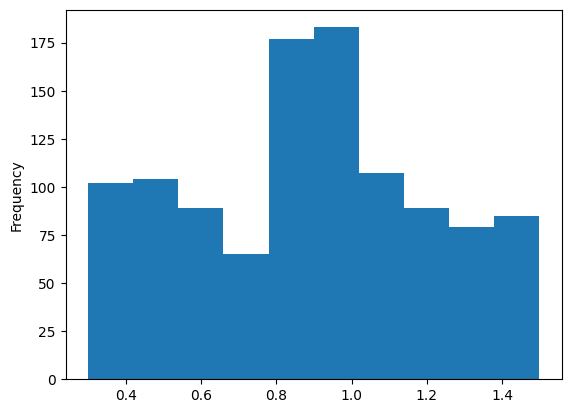

In [64]:
dataframe_concat[dataframe_concat['trial']=='images']['response_time'].plot.hist()

and a `boxplot` for ratings across `trial_type`:

<Axes: title={'center': 'response_time'}, xlabel='[trial_type]'>

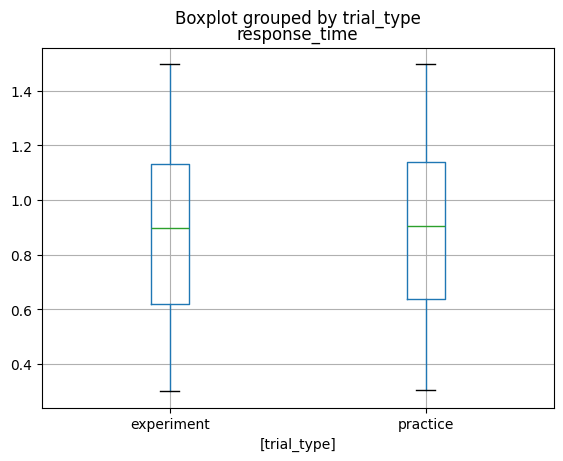

In [65]:
dataframe_concat[['trial_type', 'response_time']].boxplot(by='trial_type')

Sorry, but that's enough spoilers...way more on `data visualization` will follow in the next session! For now, we should definitely save the `concatenated DataFrame` as we need it for everything that follows! But ...

```bash
choice_rtt/
    code/
        experiment/
            crtt_exp.py
    stimuli/
        shapes/
    sourcedata/
        sub-ID
    sub-ID/
        ses-test/
            beh/
        ses-post/
            beh/            
    derivatives/
        pipeline/
            sub-ID
```

```{admonition} Where should the concatenated DataFrame be saved?
:class: tip, dropdown

It should be saved under `derivatives`, as we derived it from the `raw` `data` of all `participants`. Thus, the name should be adapted respectively.
```

In [66]:
data_dir = "/Users/peerherholz/Desktop/choice_rtt/derivatives/concatenation"

os.makedirs(data_dir, exist_ok=True)

file_name = f"group_task-choiceRTT_beh.tsv"
file_path = os.path.join(data_dir, file_name)

print('Saving DataFrame to %s' %file_path)

dataframe_concat.to_csv(file_path, sep='\t', index=False)

Saving DataFrame to /Users/peerherholz/Desktop/choice_rtt/derivatives/concatenation/group_task-choiceRTT_beh.tsv


## Outro/Q&A

What we went through in this session was intended as a super small showcase of working with certain `data formats` and `files` in `python`, specifically using `pandas` which we only just started to explore and has way more functionality. 

Sure: this was a very specific use case and `data` but the steps and underlying principles are transferable to the majority of `data handling/wrangling` problems/tasks you might encounter. As always: make sure to check the fantastic docs of the python module you're using (https://pandas.pydata.org/), as well as all the fantastic tutorials out there. 

#### The core Python "data science" stack
* The Python ecosystem contains tens of thousands of packages
* Several are very widely used in data science applications:
    * [Jupyter](http://jupyter.org): interactive notebooks
    * [Numpy](http://numpy.org): numerical computing in Python
    * [pandas](http://pandas.pydata.org/): data structures for Python
    * [Scipy](http://scipy.org): scientific Python tools
    * [Matplotlib](http://matplotlib.org): plotting in Python
    * [scikit-learn](http://scikit-learn.org): machine learning in Python

#### The core "Python for psychology" stack
* The `Python ecosystem` contains tens of thousands of `packages`
* Several are very widely used in psychology research:
    * [Jupyter](http://jupyter.org): interactive notebooks
    * [Numpy](http://numpy.org): numerical computing in `Python`
    * [pandas](http://pandas.pydata.org/): data structures for `Python`
    * [Scipy](http://scipy.org): scientific `Python` tools
    * [Matplotlib](http://matplotlib.org): plotting in `Python`
    * [seaborn](https://seaborn.pydata.org/index.html): plotting in `Python`
    * [scikit-learn](http://scikit-learn.org): machine learning in `Python`
    * [statsmodels](https://www.statsmodels.org/stable/index.html): statistical analyses in `Python`
    * [pingouin](https://pingouin-stats.org/): statistical analyses in `Python`
    * [psychopy](https://www.psychopy.org/): running experiments in `Python`
    * [nilearn](https://nilearn.github.io/stable/index.html): brain imaging analyses in `Python``
    * [mne](https://mne.tools/stable/index.html): electrophysiology analyses in `Python` 
    * there are many free tutorials online that will go into greater detail and also cover other `packages`